# Titanic
## Ejercicio final, anàlisis de un conjunto de datos. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Descripción del conjunto de datos: número de observaciones, muestra los nombres de las  columnas. Muestra las 5 primeras filas
2. Mostrar la probabilidad de supervivencia según el sexo.
3. Cuantas clases había? Cual es la media de edad de cada clase? Mostrar la probabilidad de supervivencia por clase.
4. Crea una nueva columna de datos *Fam* que sea el resultado de sumar SibSp y Parch, con esto conoceremos el número de familiares que cada persona tenía en el barco. Elimina la columna PassengerId.
5. Crea una función que reciba una lista por parámetro y devuelva una nueva lista de valores *True* / *False*. *True* Si el valor recibido es mayor a 3, *False* en caso contrario. Probad vuestra función con la columna *Fam*. Cuantas personas tienen más de 3 familiares?
5. Rellenar las edades faltantes con la media de las edades. **Esta pregunta puntua doble si** rellenais las edades faltantes con la media de la clase de cada individuo. 
6. Con el resultado anterior dibuja un histograma de las edades del barco.
7. Cuales son los nombres de las 10 personas mas mayores? Cuantos menores de 18 años había en el barco? Cúal es la diferencia entre la persona mayor y la mas joven?
8. Cual es el precio medio de ticket (Fare) de los supervivientes, y de los no supervivientes?
9. Existe alguna relación entre la edad  y el número de familiares? Puedes evaluarlo mediante la aplicación de una regresión lineal? Muestra el gráfico y explica tus propias conclusiones.
10. Cread un json de las 10 primeras filas, guardadlo en un fichero llamado *resumen.json*


# Descripción del conjunto de datos: número de observaciones, muestra los nombres de las columnas. Muestra las 5 primeras filas

In [2]:
df_titanic = pd.read_csv('https://raw.githubusercontent.com/Javomgo/MADM2018/master/final/train.csv') #lee el csv y lo almacena en la variable titanic
print('El número de observaciones es: ' + str(df_titanic.shape[0])) #Muestra el número de observaciones.
print('_'*50)
print('Los nombres de las columnas son: ' + str(df_titanic.columns.values)) #Muestra el nombre de las columnas.
print('_'*50)
df_titanic.head() #Muestra las 5 primeras filas.

El número de observaciones es: 891
__________________________________________________
Los nombres de las columnas son: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
__________________________________________________


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Mostrar la probabilidad de supervivencia según el sexo.

In [3]:
df_titanic[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


# Cuantas clases había? Cual es la media de edad de cada clase? Mostrar la probabilidad de supervivencia por clase.

In [4]:
print('Habían ' + str(df_titanic['Pclass'].unique().shape[0]) + ' clases') #Muestra el número de clases.
print('_'*30)
print(df_titanic[['Pclass', 'Age']].groupby(['Pclass']).mean()) #Muestra la edad media de cada clase.
print('_'*30)
print(df_titanic[['Pclass', 'Survived']].groupby(['Pclass']).mean()) #Muestra la probabilidad de supervivencia de cada clase.

Habían 3 clases
______________________________
              Age
Pclass           
1       38.233441
2       29.877630
3       25.140620
______________________________
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


# Crea una nueva columna de datos Fam que sea el resultado de sumar SibSp y Parch, con esto conoceremos el número de familiares que cada persona tenía en el barco. Elimina la columna PassengerId.

In [5]:
df_titanic['Fam'] = df_titanic['SibSp'] + df_titanic['Parch'] #Suma SibSp y Parch para crear Fam.
df_titanic = df_titanic.drop(['PassengerId'], axis = 1) #Elimina la columna PassengerId.

# Crea una función que reciba una lista por parámetro y devuelva una nueva lista de valores True / False. True Si el valor recibido es mayor a 3, False en caso contrario. Probad vuestra función con la columna Fam. Cuantas personas tienen más de 3 familiares?

In [6]:
def mayor_3 (lista):
    resultado = []
    lista = input("Escribe el nombre de la columna que quieras comprobar: ")
    for i in range (0,df_titanic[lista].shape[0]):
        if df_titanic[lista][i] > 3:
            resultado.append(True)
        else:
            resultado.append(False)
    return resultado
    
lista = ()
lista_fam = mayor_3(lista)
print(lista_fam)
print('_'*50)
lista_fam.count(True)

Escribe el nombre de la columna que quieras comprobar: Fam
[False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa

62

# Rellenar las edades faltantes con la media de las edades. Esta pregunta puntua doble si rellenais las edades faltantes con la media de la clase de cada individuo.

In [14]:
edad_estimada = np.zeros((1,3))
edad_estimada_temp = np.zeros((1,3))

for i in range (0,3):
    edad_estimada_clase = df_titanic[(df_titanic['Pclass'] == i+1)]['Age'].dropna()
    edad_estimada_temp[0,i] = edad_estimada_clase.mean()
    df_titanic.loc[(df_titanic.Age.isnull()) & (df_titanic.Pclass == i+1), 'Age'] = edad_estimada[0,i]
    
df_titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      25.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     30.0
18     31.0
19     25.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     25.0
27     19.0
28     25.0
29     25.0
       ... 
861    21.0
862    48.0
863    25.0
864    24.0
865    42.0
866    27.0
867    31.0
868    25.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    25.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

# Con el resultado anterior dibuja un histograma de las edades del barco.

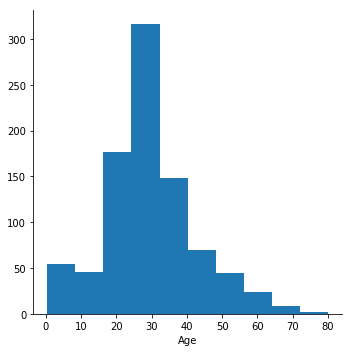

In [95]:
histogr = sns.FacetGrid(df_titanic, size = 5)
histogr.map(plt.hist, 'Age')

# Cuales son los nombres de las 10 personas mas mayores? Cuantos menores de 18 años había en el barco? Cúal es la diferencia entre la persona mayor y la mas joven?

In [146]:
df_edad = df_titanic.set_index('Age').sort_values('Age', ascending = False)
print(df_edad.loc[:,'Name'].head(10))
print('_'*50)
print('El número de menores de 18 años en el barco era de: ' + str(df_edad.loc[17.9:].shape[0]))
print('_'*50)
diferencia_edad = df_edad.index[0] - df_edad.index[df_edad.shape[0]-1]
print('La diferencia de edad entre la persona mayor y la más joven es: ' + str(diferencia_edad))

Age
80.0    Barkworth, Mr. Algernon Henry Wilson
74.0                     Svensson, Mr. Johan
71.0               Goldschmidt, Mr. George B
71.0                 Artagaveytia, Mr. Ramon
70.5                    Connors, Mr. Patrick
70.0             Mitchell, Mr. Henry Michael
70.0            Crosby, Capt. Edward Gifford
66.0                   Wheadon, Mr. Edward H
65.0               Millet, Mr. Francis Davis
65.0          Ostby, Mr. Engelhart Cornelius
Name: Name, dtype: object
__________________________________________________
El número de menores de 18 años en el barco era de: 113
__________________________________________________
La diferencia de edad entre la persona mayor y la más joven es: 79.58


# Cual es el precio medio de ticket (Fare) de los supervivientes, y de los no supervivientes?

El conjunto de datos se llama *train.csv*